# Homework 5: Option 1 - predicting a person's “Empathy”
UIC CS 412, Fall 2018

Author: Fangfang Fu
Netid: ffu3
Date: 12/1/2018

# Data and Task
Based on choosing option 1, the data is Young People Survey dataset (https://www.kaggle.com/miroslavsabo/young-people-survey/). The task is to build a model to predict a person's “Empathy” as either “very empathetic” (answers 4 and 5) or “not very empathetic” (answers 1, 2, and 3).

To process the data, At first, I used Pandas to read csv files and its DataFrame to process data into binary features with the following steps:
1. get empathy column as Y, fill the blank with its located column's mode, and replace 1,2,3 to -1 and 4,5 to 1
2. get any other columns as X features and fill the blank with its located column's mode
3. convert strings into small numbers 1,2,3,4,5 level and then convert >= 4 to 1 and < 4 to 0, which depends on how they may relate to empathy based on my general knowledge.
4. convert big numbers into 0 and 1 and those are separated by either median or mode
5. split the data into 60% train, 20% develop, 20% test


In [9]:
import pandas as pd
import numpy as np
from statistics import mode
from sklearn.model_selection import train_test_split
import sys

# get Yall
df = pd.read_csv("responses.csv", sep = ",", usecols=[94])
# fill blank with mode of its column
headers = list(df)
df[headers]=df[headers].fillna(df.mode().iloc[0])
# process the data to -1 and 1
df.Empathy[df.Empathy < 4] = -1
df.Empathy[df.Empathy >= 4] = 1
Yall = df['Empathy'].values
print (Yall)

# get Xall
df = pd.read_csv("responses.csv", sep = ",", usecols=list(range(0,94)) + list(range(95,150)))
# fill blank with mode of its column
headers = list(df)
df[headers]=df[headers].fillna(df.mode().iloc[0])
# process the data to 0 and 1
mapping = {'never smoked':1, 'tried smoking':2, 'former smoker':3, 'current smoker':4,   # Smoking
        'never':1, 'social drinker':3, 'drink a lot':4,   # Alcohol
        'i am always on time':1, 'i am often early':2, 'i am often running late':4,   # Punctuality
        'never':1, 'only to avoid hurting someone':2, 'sometimes':4, 'everytime it suits me':5,   # Lying
        'less than an hour a day':1, 'few hours a day':4, 'most of the day':5,   # Internet usage
        'female':1, 'male':4,   # Gender
        'right handed':1, 'left handed':4,   # Left - right handed
        'primary school':1, 'secondary school':2, 'college/bachelor degree':4, 'masters degree':5, 'doctorate degree':6, # Education
        'no':1, 'yes':4,   # Only child
        'village':1, 'city':4,   # Village - town
        'block of flats':1, 'house/bungalow':4}    # House - block of flats
df2 = df.applymap(lambda s: mapping.get(s) if s in mapping else s)
df2['Age'] = np.where(df2['Age'] < 23, 1, 4)     # Age min =15, max = 30
df2['Height'] = np.where(df2['Height'] <= 170, 1, 4)     # Height min = 62, max = 203, mode = 170
df2['Weight'] = np.where(df2['Weight'] <= 60, 1, 4)     # Weight min = 41, max = 165, mode = 60
df2['Number of siblings'] = np.where(df2['Number of siblings'] == 0, 1, 4)      # Number of siblings min = 0, max = 10, mode = 1
Xall = np.where(df2 < 4, 0, 1) 
print (Xall)

# Split the data - Train: 60%, Develop: 20%, Test: 20%
Xtr,Xte,Ytr,Yte = train_test_split(Xall, Yall, test_size=0.2, random_state=0)
Xtr,Xde,Ytr,Yde = train_test_split(Xtr, Ytr, test_size=0.25, random_state=0)

[-1. -1.  1. ...  1.  1.  1.]
[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 1 1 0]
 [1 0 0 ... 0 1 0]
 [1 1 1 ... 0 0 1]]


# Dummy Classifier
I used the sklearn-DummyClassifier as simple baselines to compare with other (real) classifiers. Since there is no parameter, so no need to tune it. 


The first baseline is uniform which will generate predictions uniformly at random. Since it is random, the prediction accuracy should be around 50%.

In [8]:
from sklearn.dummy import DummyClassifier
import numpy as np
import data

# DummyClassifier: uniform
dummy = DummyClassifier(strategy='uniform')
dummy.fit(data.SurveyData.Xtr, data.SurveyData.Ytr)
# there is no parameter to tune for this simple classifier
print ("random uniform:")
print ("Train Accuracy: {0}".format(np.mean(dummy.predict(data.SurveyData.Xtr) == data.SurveyData.Ytr)))
print ("Develop Accuracy: {0}".format(np.mean(dummy.predict(data.SurveyData.Xde) == data.SurveyData.Yde)))
print ("Test Accuracy: {0}".format(np.mean(dummy.predict(data.SurveyData.Xte) == data.SurveyData.Yte)))

random uniform:
Train Accuracy: 0.5115511551155115
Develop Accuracy: 0.4158415841584158
Test Accuracy: 0.5297029702970297


The second baseline is most frequent. The prediction accuracy of most_frequent is not that bad considering as a dummy classifier.

In [7]:
from sklearn.dummy import DummyClassifier
import numpy as np
import data

# DummyClassifier: most_frequent
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(data.SurveyData.Xtr, data.SurveyData.Ytr)
# there is no parameter to tune for this simple classifier
print ("most frequent:")
print ("Train Accuracy: {0}".format(np.mean(dummy.predict(data.SurveyData.Xtr) == data.SurveyData.Ytr)))
# Train Accuracy: 0.6501650165016502
print ("Develop Accuracy: {0}".format(np.mean(dummy.predict(data.SurveyData.Xde) == data.SurveyData.Yde)))
# Develop Accuracy: 0.693069306930693
print ("Test Accuracy: {0}".format(np.mean(dummy.predict(data.SurveyData.Xte) == data.SurveyData.Yte)))
# Test Accuracy: 0.6732673267326733

most frequent:
Train Accuracy: 0.6501650165016502
Develop Accuracy: 0.693069306930693
Test Accuracy: 0.6732673267326733


# Decision Tree Classifier
The first real model I tried is the sklearn-DecisionTreeClassifier model. The test prediction accuracy is better than random uniform classifier and is similar as most frequent classifier. The only problem is that the best max_depth is not stable even with same data to train and tune it. Sometimes the best max_depth could be 7 which is relative high and sometimes it is 2. 

The good thing about decision tree is that you can choose the best feature in order to make decision tree. However, for this data, there are up to 149 features, there could be so many features that are equivalent important. Plus, decision tree classifier need binary features, so the preprocess to convert all the features to binary data will reduce the precision of the data.

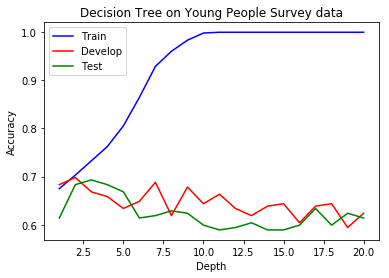

dt:
Best Max Depth: 2
Judgment calls?
-N-> Parents' advice?
|    -N-> class 0	(72.0 for class 0, 40.0 for class 1)
|    -Y-> class 1	(26.0 for class 0, 43.0 for class 1)
-Y-> Psychology?
|    -N-> class 1	(82.0 for class 0, 160.0 for class 1)
|    -Y-> class 1	(32.0 for class 0, 151.0 for class 1)
Train Accuracy: 0.7029702970297029
Develop Accuracy: 0.698019801980198
Test Accuracy: 0.6831683168316832


In [6]:
from sklearn.tree import DecisionTreeClassifier
from numpy import *
from pylab import *
import data

size = 21
depth = range(1,size)
trainErr  = zeros(size-1)
devErr = zeros(size-1)
testErr   = zeros(size-1)
maxDevCurr = 0
bestDepth = 0
# train and tune the model with train and dev data
for i in range(1,size):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(data.SurveyData.Xtr, data.SurveyData.Ytr)
    trainErr[i-1] = np.mean(dt.predict(data.SurveyData.Xtr) == data.SurveyData.Ytr)
    devErr[i-1] = np.mean(dt.predict(data.SurveyData.Xde) == data.SurveyData.Yde)
    testErr[i-1] = np.mean(dt.predict(data.SurveyData.Xte) == data.SurveyData.Yte)
    if devErr[i-1] > maxDevCurr:
        maxDevCurr = devErr[i-1]
        bestDepth = i

# draw hyperparameter curve
plot(depth, trainErr, 'b-',
     depth, devErr, 'r-',
     depth, testErr, 'g-')
legend( ('Train', 'Develop','Test') )
xlabel('Depth')
ylabel('Accuracy')
title('Decision Tree on Young People Survey data')
show()  

# train the model with the best max_depth tuned by dev data
dt = DecisionTreeClassifier(max_depth=bestDepth)
dt.fit(data.SurveyData.Xtr, data.SurveyData.Ytr)

# print all prediction accuracy results and the decision tree
print ("dt:")
print("Best Max Depth: {0}".format(dt.get_params()['max_depth']))
data.showTree(dt, data.SurveyData.headers)
print ("Train Accuracy: {0}".format(np.mean(dt.predict(data.SurveyData.Xtr) == data.SurveyData.Ytr)))
# Train Accuracy: 0.7029702970297029
print ("Develop Accuracy: {0}".format(np.mean(dt.predict(data.SurveyData.Xde) == data.SurveyData.Yde)))
# Develop Accuracy: 0.698019801980198
print ("Test Accuracy: {0}".format(np.mean(dt.predict(data.SurveyData.Xte) == data.SurveyData.Yte)))
# Test Accuracy: 0.6831683168316832

# K Nearest Neighbors Classifier
Next, I tried the sklearn-KNeighborsClassifier model. The prediction accuracy is better than random uniform classifier and slightly better than most frequent classifier, decision tree classifier. And the performance is very stable comparing to decision tree. 

KNN will treat all features equivalent important which is relatively good for data that has a big amount of features. Since KNN model use distances between data samples, it is very sensitive to feature values. Plus, the data has different number of values for each feature. So I used same preprocessed data as decision tree and thus it also reduces the precision of the data.

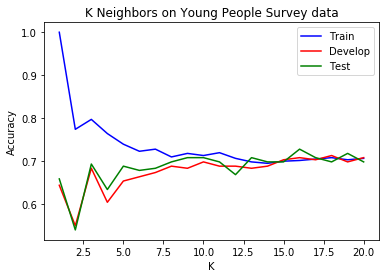

KNN:
Best K: 18
Train Accuracy: 0.7079207920792079
Develop Accuracy: 0.7128712871287128
Test Accuracy: 0.698019801980198


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from numpy import *
from pylab import *
import data

size = 21
depth = range(1,size)
trainErr  = zeros(size-1)
devErr = zeros(size-1)
testErr   = zeros(size-1)
maxDevCurr = 0
bestK = 1
# train and tune the model with train and dev data
for i in range(1,size):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(data.SurveyData.Xtr, data.SurveyData.Ytr)
    trainErr[i-1] = np.mean(neigh.predict(data.SurveyData.Xtr) == data.SurveyData.Ytr)
    devErr[i-1] = np.mean(neigh.predict(data.SurveyData.Xde) == data.SurveyData.Yde)
    testErr[i-1] = np.mean(neigh.predict(data.SurveyData.Xte) == data.SurveyData.Yte)
    if devErr[i-1] > maxDevCurr:
        maxDevCurr = devErr[i-1]
        bestK = i

# draw hyperparameter curve
plot(depth, trainErr, 'b-',
     depth, devErr, 'r-',
     depth, testErr, 'g-')
legend( ('Train', 'Develop','Test') )
xlabel('K')
ylabel('Accuracy')
title('K Neighbors on Young People Survey data')
show() 

# train the model with the best K tuned by dev data
neigh = KNeighborsClassifier(n_neighbors=bestK)
neigh.fit(data.SurveyData.Xtr, data.SurveyData.Ytr)

# print all prediction accuracy results
print("KNN:")
print("Best K: {0}".format(neigh.get_params()['n_neighbors']))
print ("Train Accuracy: {0}".format(np.mean(neigh.predict(data.SurveyData.Xtr) == data.SurveyData.Ytr)))
# Train Accuracy: 0.7079207920792079
print ("Develop Accuracy: {0}".format(np.mean(neigh.predict(data.SurveyData.Xde) == data.SurveyData.Yde)))
# Develop Accuracy: 0.7128712871287128
print ("Test Accuracy: {0}".format(np.mean(neigh.predict(data.SurveyData.Xte) == data.SurveyData.Yte)))
# Test Accuracy: 0.698019801980198

# Target Model: Perceptron
Finally, I tried the sklearn-Perceptron model. Since perceptron uses weight for each feature, it is not very sensitive to feature values and it also considers all features comprehensively. Thus, I only preprocess the data by converting the string to a range of small values(0-5) like most features.

After training and tuning the model with train and develop data, I found the best max_iter. With the best max_iter, the test prediction accuracy is better than any other classifier listed above. Thus, I choose this model with the best max_iter as my final model to predict if a person empathy or not.

The following code is how I preprocess the data for perceptron model.

In [1]:
import pandas as pd
import numpy as np
from statistics import mode
from sklearn.model_selection import train_test_split
import sys

# get Yall
df = pd.read_csv("responses.csv", sep = ",", usecols=[94])
# fill blank with mode of its column
headers = list(df)
df[headers]=df[headers].fillna(df.mode().iloc[0])
# process the data to -1 and 1
df.Empathy[df.Empathy < 4] = -1
df.Empathy[df.Empathy >= 4] = 1
Yall = df['Empathy'].values
print (Yall)

# get Xall
df = pd.read_csv("responses.csv", sep = ",", usecols=list(range(0,94)) + list(range(95,150)))
# fill blank with mode of its column
headers = list(df)
df[headers]=df[headers].fillna(df.mode().iloc[0])
# process the data to 0 and 1
mapping = {'never smoked':1, 'tried smoking':2, 'former smoker':3, 'current smoker':4,   # Smoking
        'never':1, 'social drinker':3, 'drink a lot':5,   # Alcohol
        'i am always on time':2, 'i am often early':1, 'i am often running late':3,   # Punctuality
        'never':4, 'only to avoid hurting someone':2, 'sometimes':2, 'everytime it suits me':5,   # Lying
        'no time at all':1,'less than an hour a day':2, 'few hours a day':3, 'most of the day':4,   # Internet usage
        'female':0, 'male':1,   # Gender
        'right handed':0, 'left handed':1,   # Left - right handed
        'currently a primary school pupil':0, 'primary school':1, 'secondary school':2, 'college/bachelor degree':3, 'masters degree':4, 'doctorate degree':5, # Education
        'no':0, 'yes':1,   # Only child
        'village':0, 'city':1,   # Village - town
        'block of flats':0, 'house/bungalow':1}    # House - block of flats
df2 = df.applymap(lambda s: mapping.get(s) if s in mapping else s)
Xall = df2.values     
print (Xall)

# Split the data - Train: 60%, Develop: 20%, Test: 20%
Xtr,Xte,Ytr,Yte = train_test_split(Xall, Yall, test_size=0.2, random_state=0)
Xtr,Xde,Ytr,Yde = train_test_split(Xtr, Ytr, test_size=0.25, random_state=0)

[-1. -1.  1. ...  1.  1.  1.]
[[5. 3. 2. ... 0. 0. 0.]
 [4. 4. 2. ... 0. 1. 0.]
 [5. 5. 2. ... 0. 1. 0.]
 ...
 [4. 3. 1. ... 1. 1. 0.]
 [5. 3. 3. ... 0. 1. 0.]
 [5. 5. 4. ... 0. 0. 1.]]


The following code is how I train, tune, and test the preceptron model.

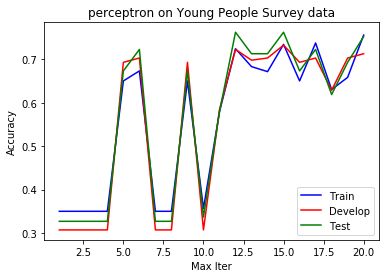

Perceptron:
Best Max Iter: 15
Train Accuracy: 0.7343234323432343
Develop Accuracy: 0.7326732673267327
Test Accuracy: 0.7623762376237624


In [3]:
from sklearn.linear_model import Perceptron
from numpy import *
from pylab import *
import data

size = 21
depth = range(1,size)
trainErr  = zeros(size-1)
devErr = zeros(size-1)
testErr   = zeros(size-1)
maxDevCurr = 0
bestMaxIter = 1
# train and tune the model with train and dev data
for i in range(1,size):
    perceptron = Perceptron(max_iter=i)
    perceptron.fit(data.PerceptronSurveyData.Xtr, data.SurveyData.Ytr)
    trainErr[i-1] = np.mean(perceptron.predict(data.PerceptronSurveyData.Xtr) == data.PerceptronSurveyData.Ytr)
    devErr[i-1] = np.mean(perceptron.predict(data.PerceptronSurveyData.Xde) == data.PerceptronSurveyData.Yde)
    testErr[i-1] = np.mean(perceptron.predict(data.PerceptronSurveyData.Xte) == data.PerceptronSurveyData.Yte)
    if devErr[i-1] > maxDevCurr:
        maxDevCurr = devErr[i-1]
        bestMaxIter = i

# draw hyperparameter curve
plot(depth, trainErr, 'b-',
     depth, devErr, 'r-',
     depth, testErr, 'g-')
legend( ('Train', 'Develop','Test') )
xlabel('Max Iter')
ylabel('Accuracy')
title('perceptron on Young People Survey data')
show() 

# train the model with the best max_iter tuned by dev data
perceptron = Perceptron(max_iter=bestMaxIter)
perceptron.fit(data.PerceptronSurveyData.Xtr, data.PerceptronSurveyData.Ytr)

# print all prediction accuracy results
print("Perceptron:")
print("Best Max Iter: {0}".format(perceptron.get_params()['max_iter']))
print ("Train Accuracy: {0}".format(np.mean(perceptron.predict(data.PerceptronSurveyData.Xtr) == data.PerceptronSurveyData.Ytr)))
# Train Accuracy: 0.7343234323432343
print ("Develop Accuracy: {0}".format(np.mean(perceptron.predict(data.PerceptronSurveyData.Xde) == data.PerceptronSurveyData.Yde)))
# Develop Accuracy: 0.7326732673267327
print ("Test Accuracy: {0}".format(np.mean(perceptron.predict(data.PerceptronSurveyData.Xte) == data.PerceptronSurveyData.Yte)))
# Test Accuracy: 0.7623762376237624

Show some examples from the development data that the perceptron model got correct and some it got wrong: if you were to try to fix the ones it got wrong, what would you do?

Answer: The misclassified data is probably because the data itself is not linearly separable. Next time, we can try the SVC (combine the perceptron with kernel trick to build support vector machine) that can separate non-linearly separable data.

In [4]:
print (perceptron.predict(data.PerceptronSurveyData.Xtr) == data.PerceptronSurveyData.Ytr)
print ("\ncorrect examples:")
print ("X = {0}".format(data.PerceptronSurveyData.Xtr[0]))
print ("Y = {0}\n".format(data.PerceptronSurveyData.Ytr[0]))
print ("X = {0}".format(data.PerceptronSurveyData.Xtr[1]))
print ("Y = {0}\n".format(data.PerceptronSurveyData.Ytr[1]))
print ("X = {0}".format(data.PerceptronSurveyData.Xtr[2]))
print ("Y = {0}\n".format(data.PerceptronSurveyData.Ytr[2]))
print ()
print ("wrong examples:")
print ("X = {0}".format(data.PerceptronSurveyData.Xtr[5]))
print ("Y = {0}\n".format(data.PerceptronSurveyData.Ytr[5]))
print ("X = {0}".format(data.PerceptronSurveyData.Xtr[6]))
print ("Y = {0}\n".format(data.PerceptronSurveyData.Ytr[6]))
print ("X = {0}".format(data.PerceptronSurveyData.Xtr[8]))
print ("Y = {0}\n".format(data.PerceptronSurveyData.Ytr[8]))

[ True  True  True  True  True False False  True False  True False  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False False  True  True  True  True  True  True False  True
  True False  True False  True  True  True  True False  True  True False
  True  True False False False  True False  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True False False
 False  True  True False  True  True False  True  True  True False  True
  True  True False  True  True  True  True  True  True False False  True
 False  True  True False  True False  True False  True  True  True False
  True False  True  True  True  True  True False  True  True  True  True
 False False  True  True  True False False  True  True False  True  True
  True  True False  True  True  True False  True False  True False  True
  True False  True False False  True  True  True  T

# Summary
Since the task is to classify the binary data with features, decision tree, KNN, perceptron are all pretty simple and good at it. After trying all three models, I choose Perceptron model with max_iter = 15 as my final model to predict if a person empathy or not since it has the highest test prediction accuracy and has very stable performance.

Tools used:
Pandas library to read and process the data since it can read, extract, and modifying data the csv file convinently.
sklearn library to get all sorts of popular classifiers to classify binary data.
pylab to help draw the hyperparameter curve.